In [1]:
from pathlib import Path
import zipfile
import h5py
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal

def raw_to_volts(array):
    volts_per_bin = np.array([5, 0.5]) / 2**14
    # remove mean
    array = array - np.mean(array, axis=-1)[:, :, :, :, np.newaxis]
    # convert
    array = array * volts_per_bin[np.newaxis, np.newaxis, np.newaxis, :, np.newaxis]
    # IQ data
    #array = signal.hilbert(array)
    return array
    

signal_ind_max = 5242 #25717
    

In [4]:
data_array = np.load(zipfile_repository/'221230_synca1_5slot_scan_raw.npy')

In [5]:
print(data_array.shape)

(14, 10, 120, 2, 40950)


In [3]:
zipfile_repository = Path.home()/'iCloud'/'penn_state_synca_data'/'dig'/'synca1_5slot_scan'
zipfile_list = list(zipfile_repository.glob('*.zip'))

In [3]:
for item in zipfile_list:
    print(item.name)

In [4]:
rad_positions = np.arange(0, 10, 1)
angles = np.arange(0, 360, 3)

first = True

for item in zipfile_list:
    with zipfile.ZipFile(item, 'r') as myzip:
        axial_pos = int(myzip.namelist()[0].split('/')[0])
        axial_ind = (axial_pos // 5) + 3
        for rad_ind in rad_positions:
            for ang_ind in angles:
                with myzip.open(f'{axial_pos}/{rad_ind}/{ang_ind}.csv', 'r') as myfile:
                    for i in range(2):
                        line = myfile.readline().decode('utf-8').split(',')
                        line[-1] = line[-1].split('\r\n')[0]
                        line = np.array(line, dtype=np.int32)
                        if first:
                            data_array = np.zeros(
                                (len(zipfile_list), rad_positions.size, angles.size, 2, line.size,),
                                np.int32
                            )
                            #fft_array = np.zeros(
                            #    (len(zipfile_list), rad_positions.size, angles.size, 2),
                            #    np.complex128
                            #)
                            #first = False
                        data_array[axial_ind, rad_ind, ang_ind//3, i, :] = line
              
    print(item.name)

-5.zip
0.zip
50.zip
45.zip
40.zip
5.zip
30.zip
25.zip
35.zip
20.zip
10.zip
15.zip
-15.zip
-10.zip


In [30]:
first = True
shape = data_array.shape
fft_array = np.zeros((shape[0], shape[1], shape[2], 2), dtype=np.complex128)

for i in range(shape[0]):
    for j in range(shape[1]):
        for k in range(shape[2]):
            for l in range(shape[3]):

                line = data_array[i,j,k,l,:]-np.mean(data_array[i,j,k,l,:])
                if l == 0:
                    line *= 5 / 2**14
                elif l == 1:
                    line *= 0.5 / 2**14
                
                #if i < 2:
                #    print(abs(np.fft.rfft(line, norm='forward')[signal_ind_max]))
                fft_array[i,j,k,l] = np.fft.rfft(line, norm='forward')[signal_ind_max]
    print(i+1)
                    
                
                

1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [31]:
combined_name = '221230_synca1_5slot_scan_raw.npy'
combined_fft_name = '221230_synca1_5slot_scan_fft.npy'

In [24]:
np.save(zipfile_repository/combined_name, data_array)
#np.save(zipfile_repository/combined_fft_name, fft_array)

In [32]:
np.save(zipfile_repository/combined_fft_name, fft_array)

In [7]:
print(data_array.shape)

(14, 10, 120, 2, 40950)


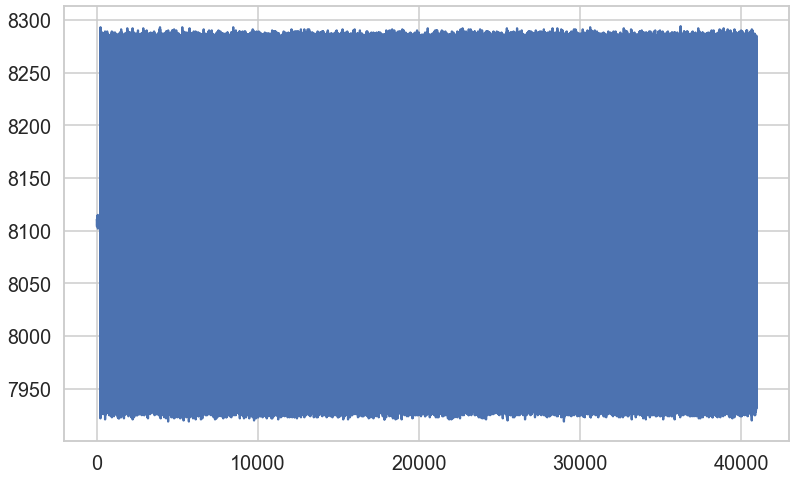

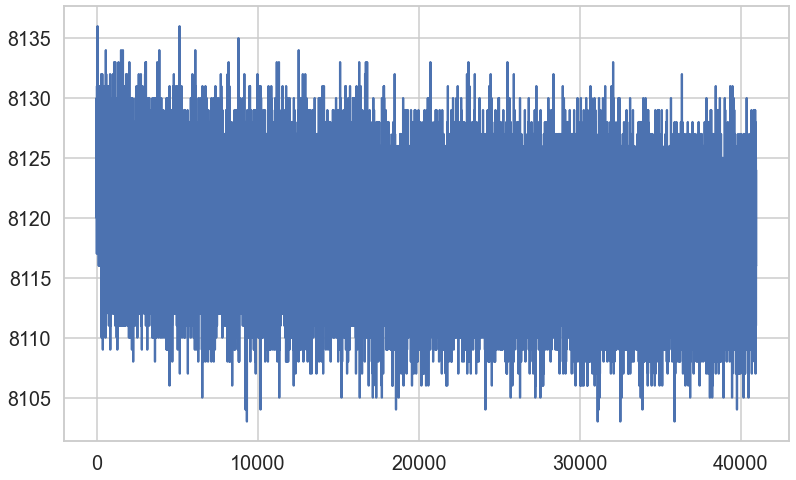

In [39]:
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

ax.plot(data_array[2, 4, 0, 0, :])
#ax.set_xlim(0, 1024)

fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

ax.plot(data_array[2, 4, 0, 1, :])
#ax.set_xlim(0, 1024)

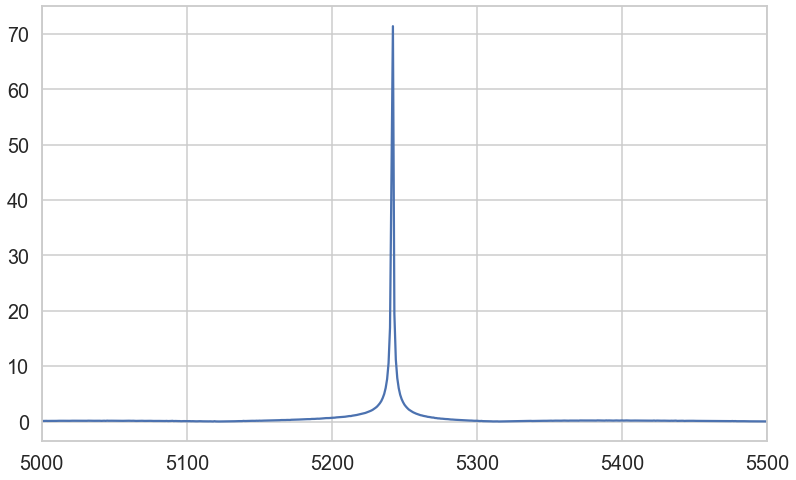

In [41]:
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)

axial_ind = 0
radial_ind = 0
signal_or_lo = 0

fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)
ax.plot(abs(
    np.fft.rfft(data_array[axial_ind, radial_ind, 0, signal_or_lo, :]-np.mean(data_array[axial_ind, radial_ind, 0, signal_or_lo, :]), norm='forward')
),)
ax.set_xlim(5000, 5500)

#fig = plt.figure(figsize=(13, 8))
#ax = fig.add_subplot(1,1,1)

mean_amp = np.zeros((14, 10))

#for i in range(14):
#    for j in range(10):
#        mean_amp[i, j] = abs(np.fft.rfft(data_array[i, j, :, 1, :]-np.mean(data_array[i,j,:,1,:]), norm='forward', axis=-1))[:, 5242].mean(axis=0)
        #print(f'{i+1}, {j+1}', abs(np.fft.rfft(data_array[i, j, :, 1, :]-np.mean(data_array[i,j,:,1,:]), norm='forward', axis=-1))[:, 5242].mean(axis=0))
#ax.set_xlim(5100, 5300)

#fig = plt.figure(figsize=(8,8))
#ax = fig.add_subplot(1,1,1)
#img = ax.imshow(mean_amp, aspect='auto')
#cbar = fig.colorbar(img)

In [15]:
for i in range(14):
    #print(np.argmax(abs(np.fft.rfft(data_array[i, 0, 0, 0, :]-np.mean(data_array[i,0,0,0,:])))))
    print(np.max(abs(np.fft.rfft(data_array[i, 0, 0, 1, :]-np.mean(data_array[i,0,0,1,:]), norm='forward'))))
    print(np.argmax(abs(np.fft.rfft(data_array[i, 0, 0, 1, :]-np.mean(data_array[i,0,0,1,:])))))

2.0382204302835905
5242
2.303714998588619
5242
2.295280616768271
5242
2.2176964766916085
5242
1.9971218971826852
5242
1.8696556309536982
5242
1.5103818778881992
5242
0.7627737150883983
5242
0.3546404016022279
1
0.3484495613158947
1
0.38106389672590596
1
0.37354823072406734
1
0.29933039736195227
1
0.6215450775325828
5242


In [30]:
fft_array.shape

(14, 10, 120, 2)

In [33]:
fft_array[2, 4, :, 1]

array([ 2.53235161e-05+3.39705256e-05j, -6.34963702e-06-4.11106141e-05j,
       -3.70642273e-05+7.26595131e-07j,  3.55459792e-05-5.89336421e-06j,
        2.99107430e-05+1.52855421e-05j,  3.20876141e-05-5.40747663e-06j,
        2.18362244e-05+2.58513407e-05j,  3.80885949e-05-1.06827851e-05j,
        8.28975229e-06+4.60343369e-05j,  2.06845566e-05+4.81293492e-05j,
       -8.85517005e-06+5.48346256e-05j,  4.78422321e-05-2.94390448e-05j,
       -1.95012260e-05+4.99364262e-05j, -3.52851683e-05+3.11586750e-05j,
        3.88414581e-05-1.19196728e-05j, -1.69544169e-06-3.57013850e-05j,
        1.09337229e-05-3.01203385e-05j,  2.15740039e-05+2.04872556e-05j,
       -2.50547463e-06-1.71829962e-06j,  2.83510338e-05-7.89307655e-08j,
       -2.39237202e-05+1.63323484e-05j, -1.31081015e-05+3.07999040e-05j,
        3.22826769e-05+2.66026372e-05j, -1.15207926e-05+5.23320419e-05j,
       -4.58850454e-05+4.44255823e-05j,  4.75678753e-05-5.87801231e-05j,
       -2.16785320e-05-8.21059876e-05j,  9.39767680

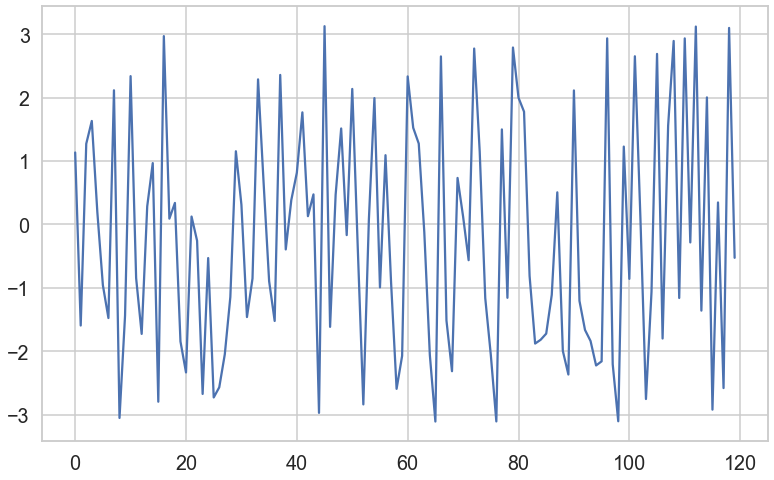

In [38]:
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

ax.plot(np.angle(fft_array[3,0,:,0]))